# Importing The Libraries

In [14]:
#pip install matplotlib
!pip install seaborn

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns




# DataSet

In [16]:
# Importing The Dataset
data = pd.read_csv('D:/Users/HENI TAILOR/Fetal Health Classification Project/fetal_health.csv')

In [17]:
# Detecting and Handling Duplicates
duplicates = data.copy()
duplicates.drop_duplicates(inplace = True)
print('Total Numbers Of Duplicates are:', data.shape[0] - duplicates.shape[0])
data = duplicates.copy()

Total Numbers Of Duplicates are: 13


In [18]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [19]:
# Size of Dataset
data.shape 

(2113, 22)

This dataset consists of 2126 data and 22 columns in total. Although there are no empty or missing values in the data set, it contains 13 duplicate values.

After the duplicate values were successfully removed from the data set, the data set to be used for model training consisted of 2113 samples and 22 columns.

In [20]:
# Column of the dataset
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [21]:
#Describe of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,133.304780,9.837451,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003188,0.003871,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.009517,0.046804,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004387,0.002941,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2113.0,0.000159,0.000592,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2113.0,46.993848,17.177782,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335021,0.884368,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2113.0,9.795078,18.337073,0.0,0.000,0.000,11.000,91.000


In [22]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability       

In [23]:
#Ckeking Missing Values
# data.isnull().sum / data.shape[0] *100

# Exploratory Data Analysis

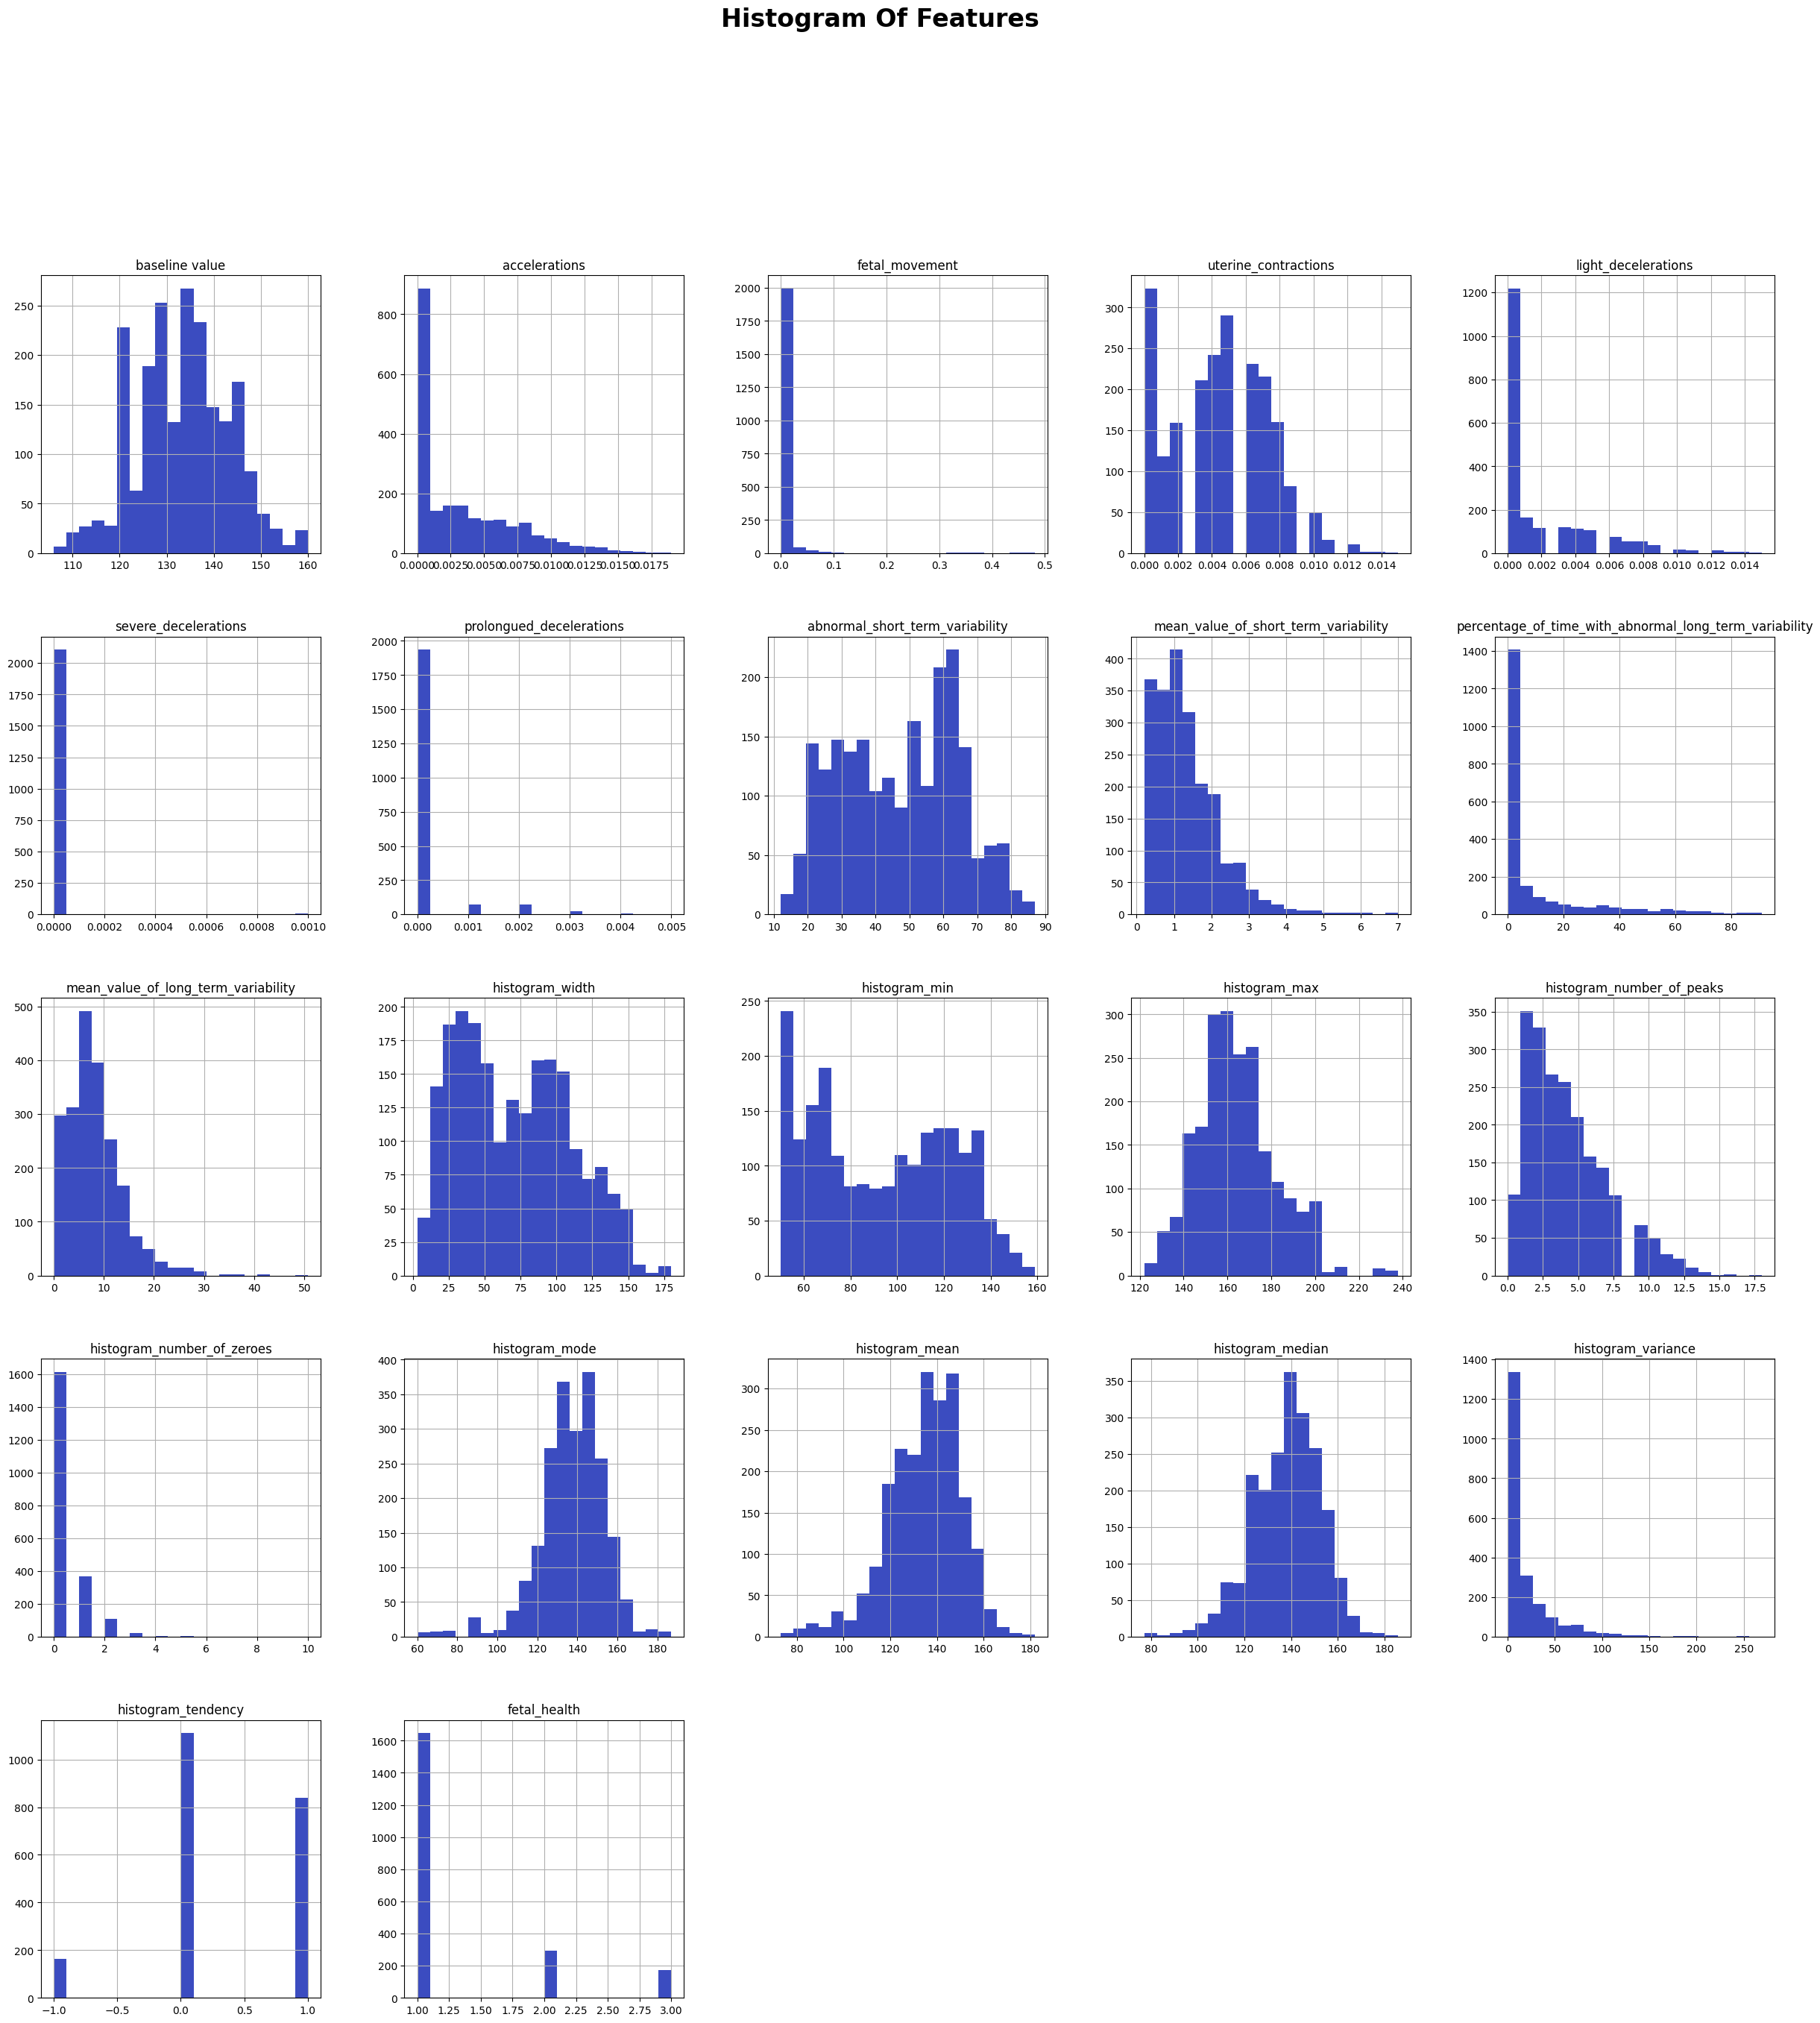

In [24]:
#Plot Histogram for The Feature
data.hist(bins = 20, figsize = (30,30), color=plt.get_cmap('coolwarm')(np.linspace(0, 1, 1)),grid=True)
hist_features = plt.suptitle('Histogram Of Features',
                            y=1,
                            fontsize = 24,
                             fontweight = 'bold'
                            )

C:\Users\hp\AppData\Local\Temp\ipykernel_11220\1629323657.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fh_status = sns.countplot(x = 'fetal_health',data=data,palette = 'coolwarm')


Text(0, 0.5, 'Count')

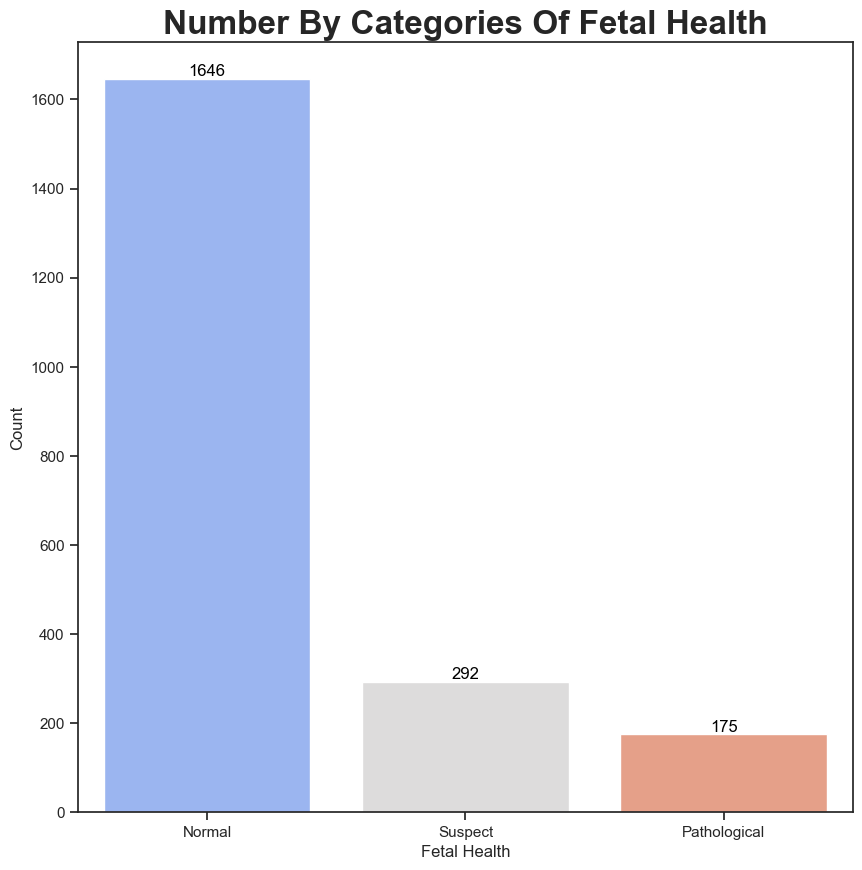

In [25]:
# Quantitative distribution histogram according to fetal health status
sns.set(style='ticks')
plt.figure(figsize=(10,10))
fh_status = sns.countplot(x = 'fetal_health',data=data,palette = 'coolwarm')

for number, count in enumerate(data['fetal_health'].value_counts()):
    fh_status.text(number, count, str(count), ha = 'center', va ='bottom', fontsize=12, color='black')
    
plt.title('Number By Categories Of Fetal Health',
         fontsize=24,
         fontweight='bold')
plt.xticks([0, 1, 2],['Normal','Suspect','Pathological'])
plt.xlabel('Fetal Health')
plt.ylabel('Count')

Text(0.5, 1.0, 'Pie Chart By Fetal Health')

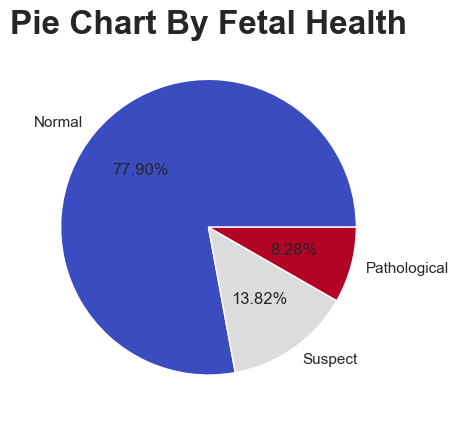

In [26]:
#PErcentage Represents According To Fetal Health Status
normal = (data['fetal_health'] == 1.0).sum()
suspect = (data['fetal_health'] == 2.0).sum()
pathological = (data['fetal_health'] == 3.0).sum()

pie_fetal_health = plt.pie([normal, suspect, pathological], labels = ['Normal','Suspect','Pathological'],
        colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, 3)),
                                 autopct="%1.2f%%")

plt.title(label='Pie Chart By Fetal Health',
         fontsize = 24,
         fontweight='bold')


According to the data seen in the figures above, a total of **2113** samples obtained from CTG examinations included **1646 normal (77.90%), 292 suspect (13.82%) and 175 pathological (8.28%)** observations representing different fetal health states.

Based on these data, it appears that the distribution of the dataset is **unbalanced**. This imbalance shows the importance of considering classes more carefully,especially those with small numbers of examples, in the analysis and model training processes.

Text(0.5, 1.0, 'correlation_matrix')

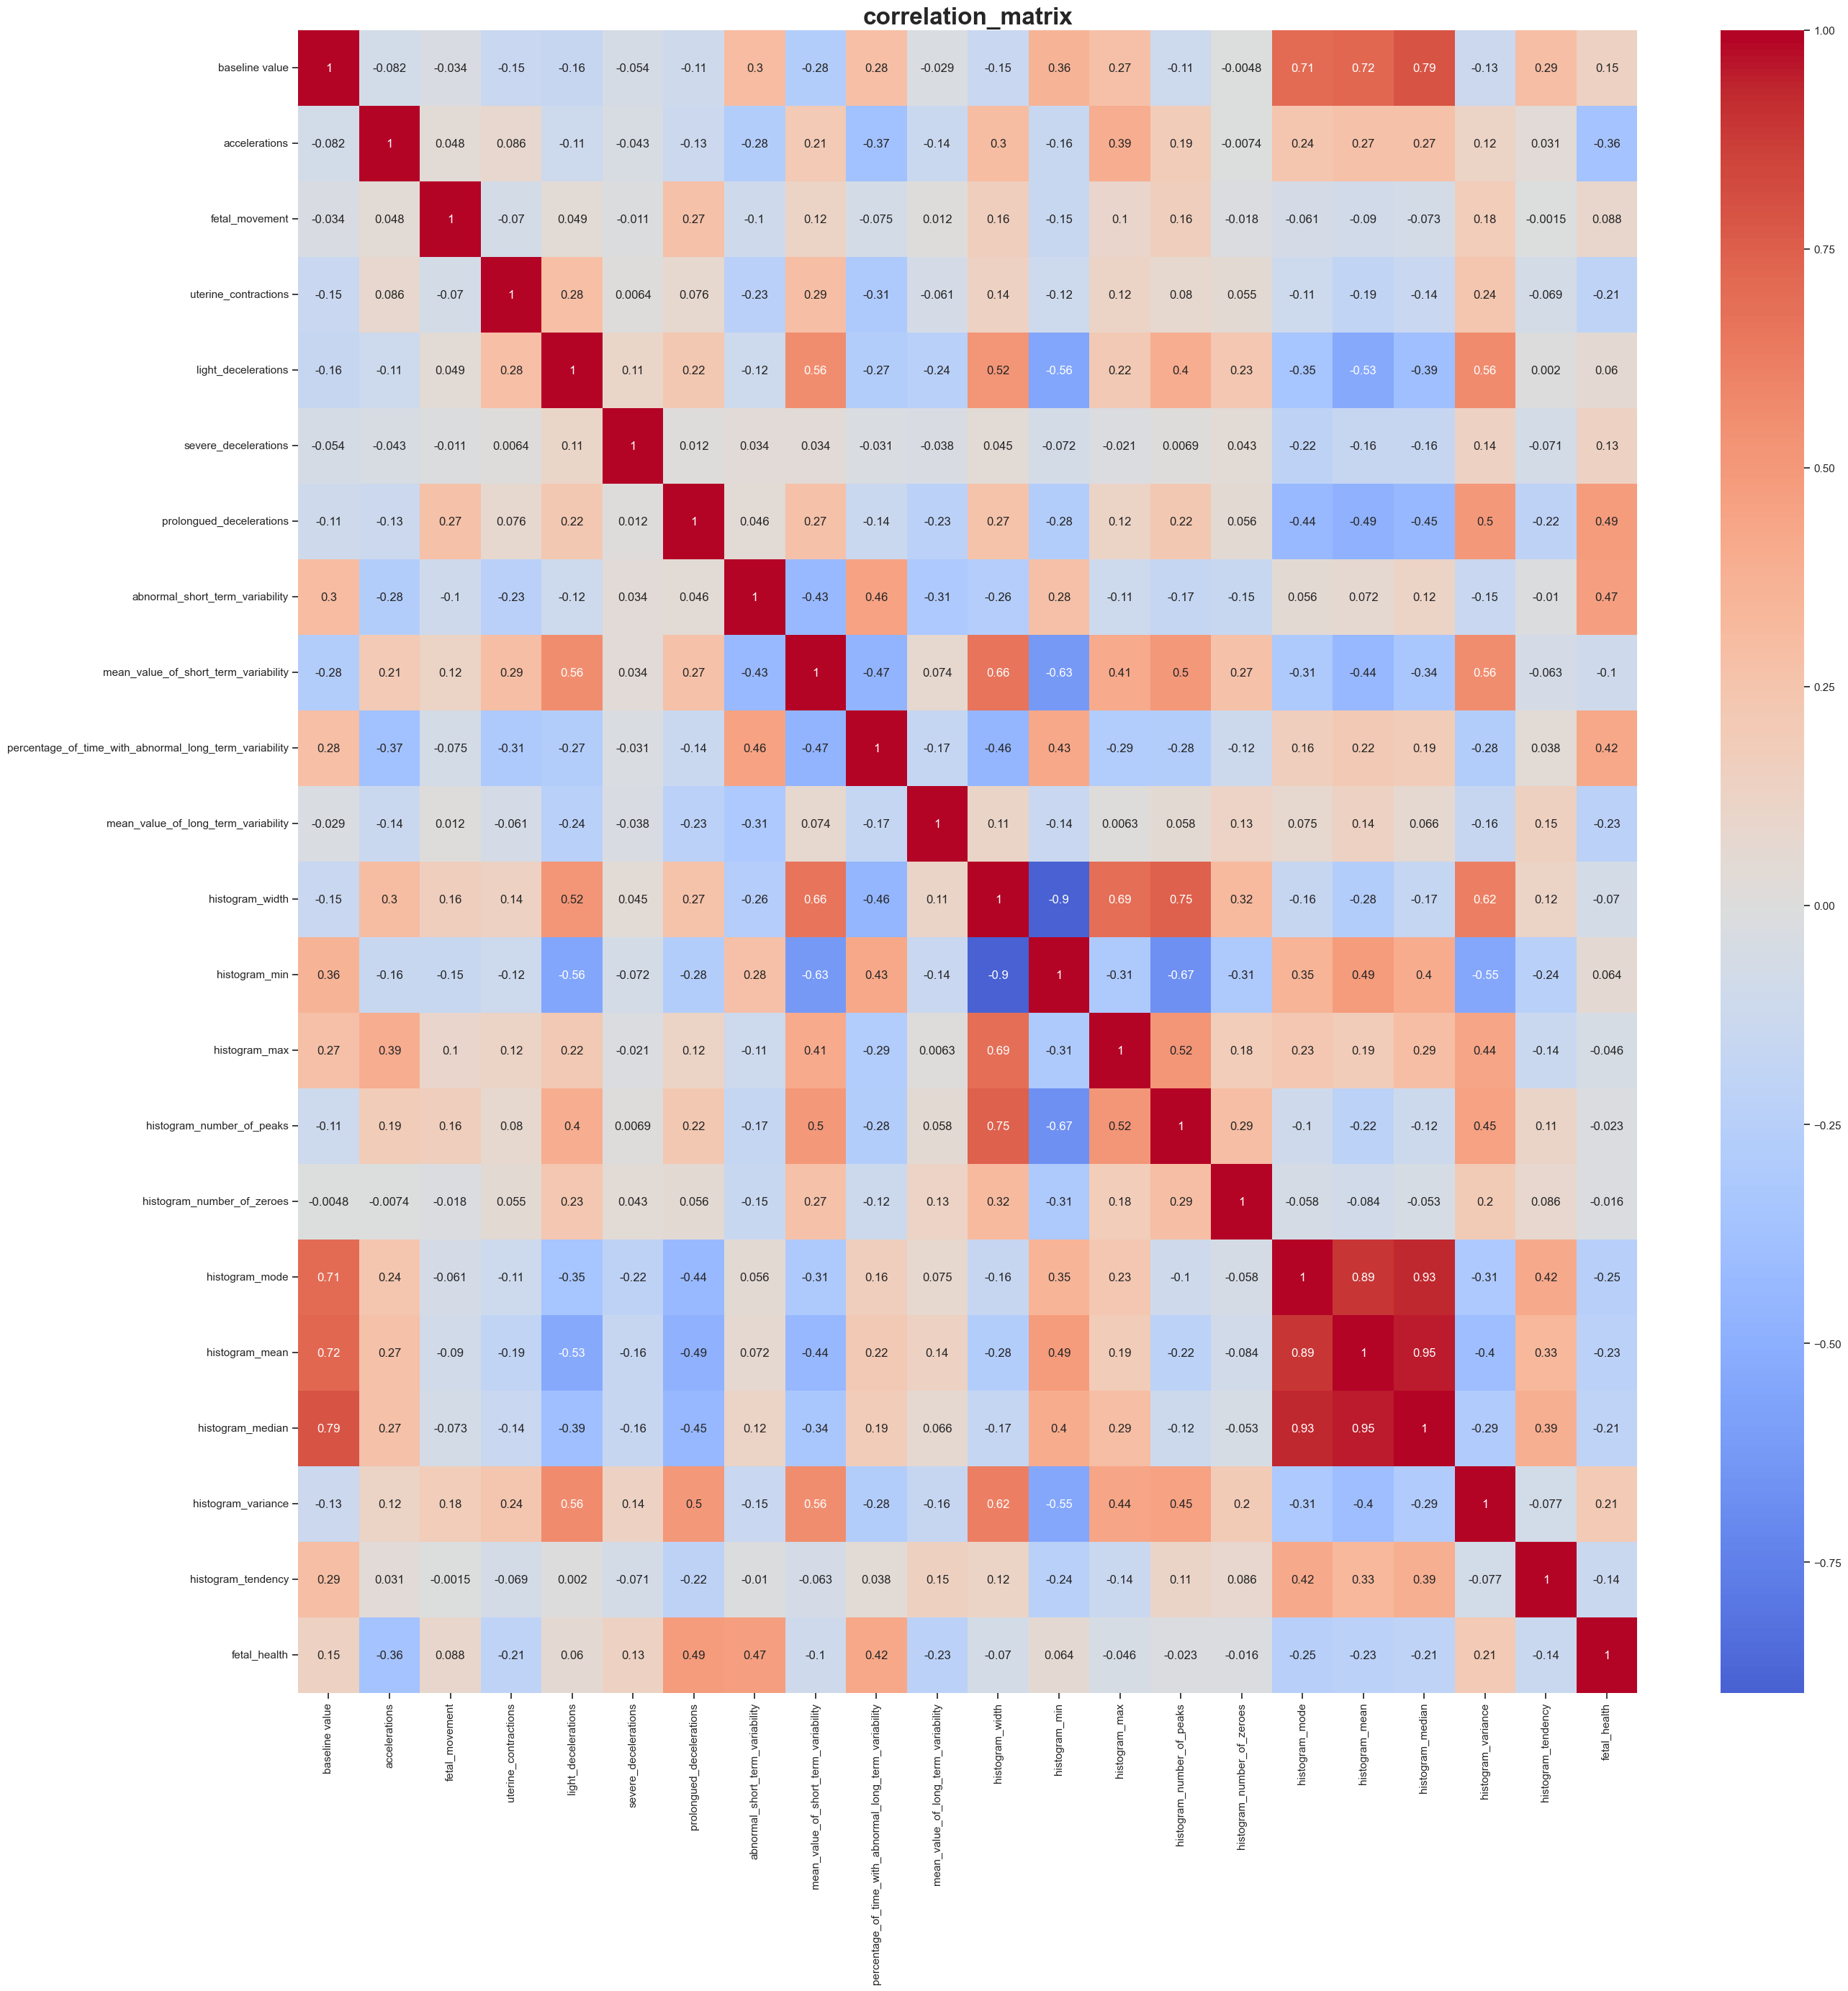

In [27]:
# Correction Matrix For All Features 

correlation_matrix = data.corr()

plt.figure(figsize =(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', center=0)

plt.title('correlation_matrix',
          fontsize = 24,
          fontweight = 'bold',
)

Visualization of the correlations of all the features of the Fetal Health Classification dataset as a correlation matrix

+1: Strong correlation
0: No correlation
−1: Strong inverse correlation

Text(0.5, 1.0, 'Correlation Of Numerical Features With Fetal_Health')

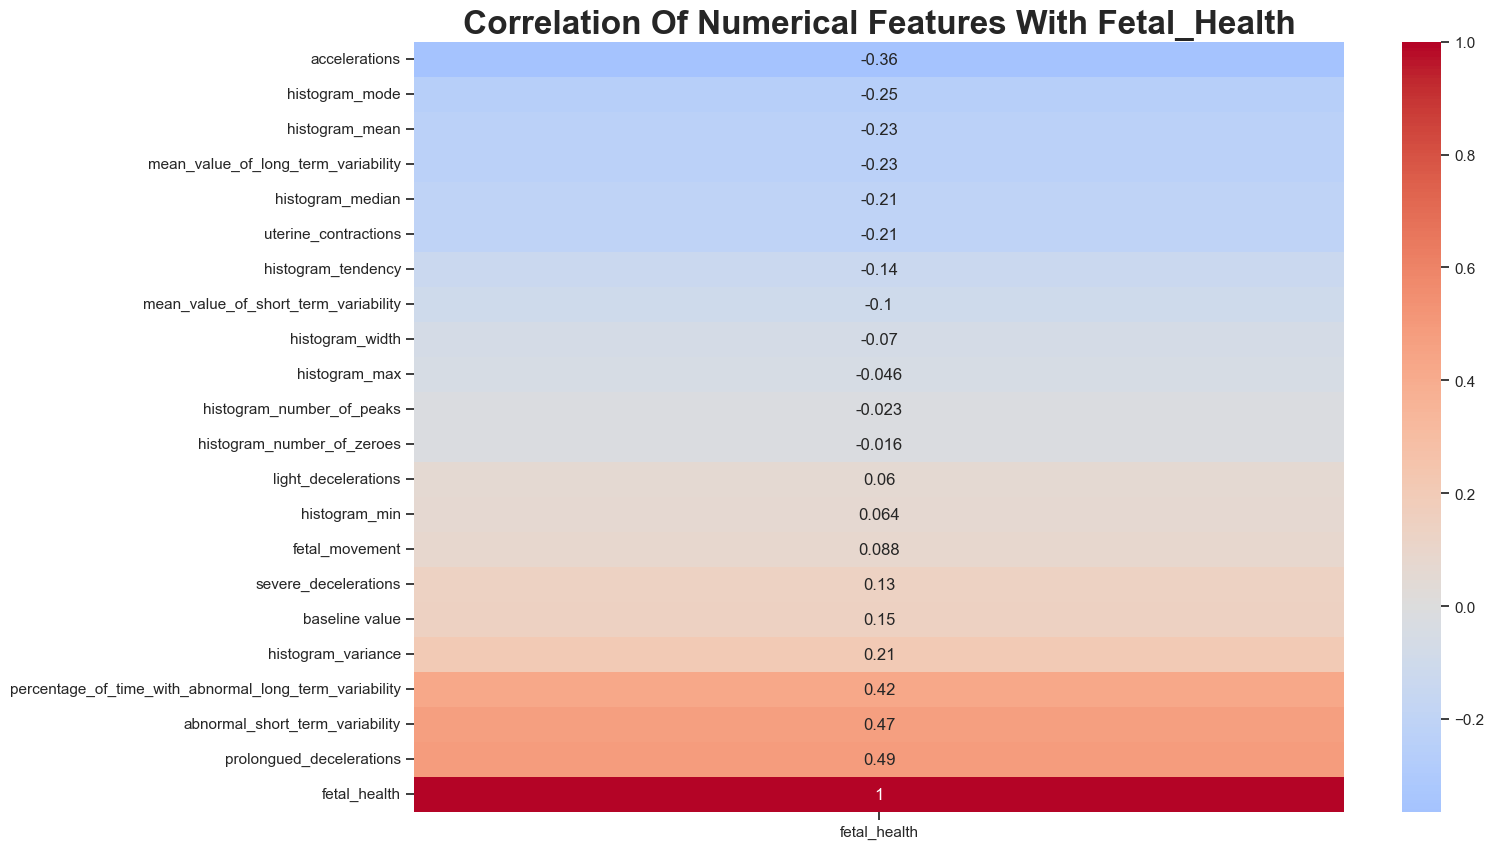

In [28]:
#correaltion of numerical features with fetal_health
correlation_matrix = data.corr()['fetal_health']

plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix.sort_values().to_frame(), annot=True, cmap = 'coolwarm', center = 0)

plt.title("Correlation Of Numerical Features With Fetal_Health",
         fontsize = 24,
         fontweight = "bold")


According to the analysis results, **prolonged decelerations, abnormal short-term variability, and percentage of time with abnormal long-term variability** exhibit a highly positive correlation with fetal health.

On the other hand, **accelerations, histogram mode and histogram mean** are highly negatively correlated with fetal health. These observations provide important guidance when evaluating the impact of specific traits on fetal health.

C:\Users\hp\AppData\Local\Temp\ipykernel_11220\3774738605.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette='coolwarm')
C:\Users\hp\AppData\Local\Temp\ipykernel_11220\3774738605.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette='coolwarm')
C:\Users\hp\AppData\Local\Temp\ipykernel_11220\3774738605.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette='coolwarm')
C:\Users\hp\AppData\Local\Temp\ipykernel_11220

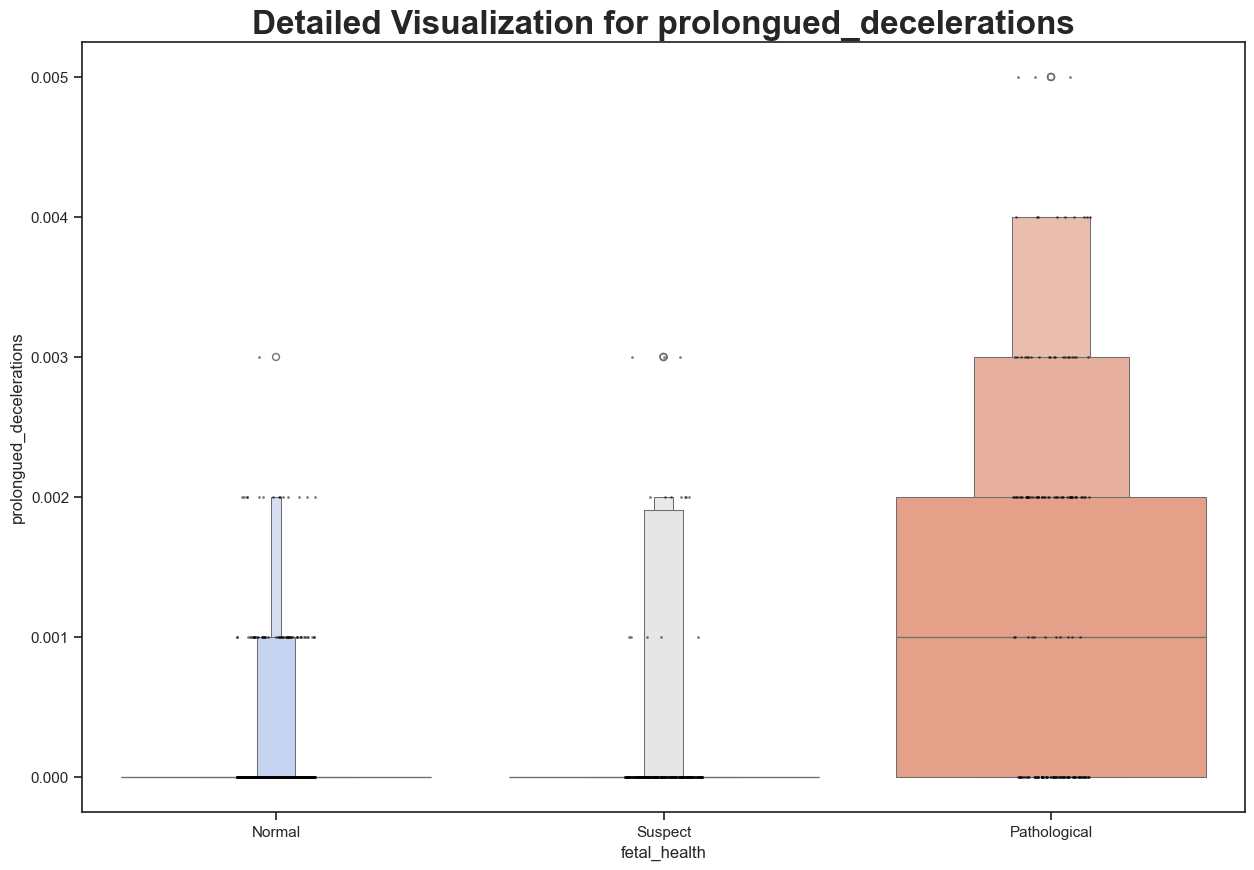

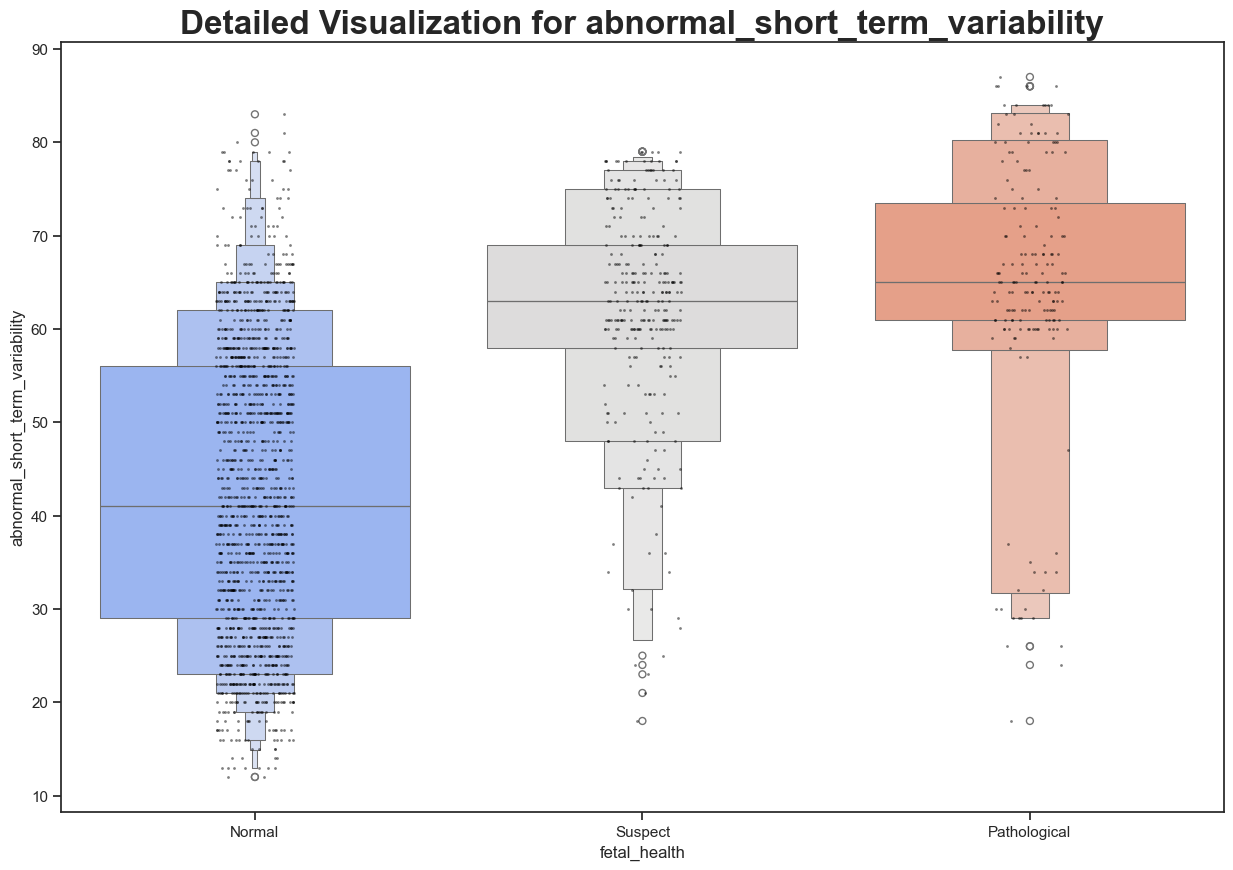

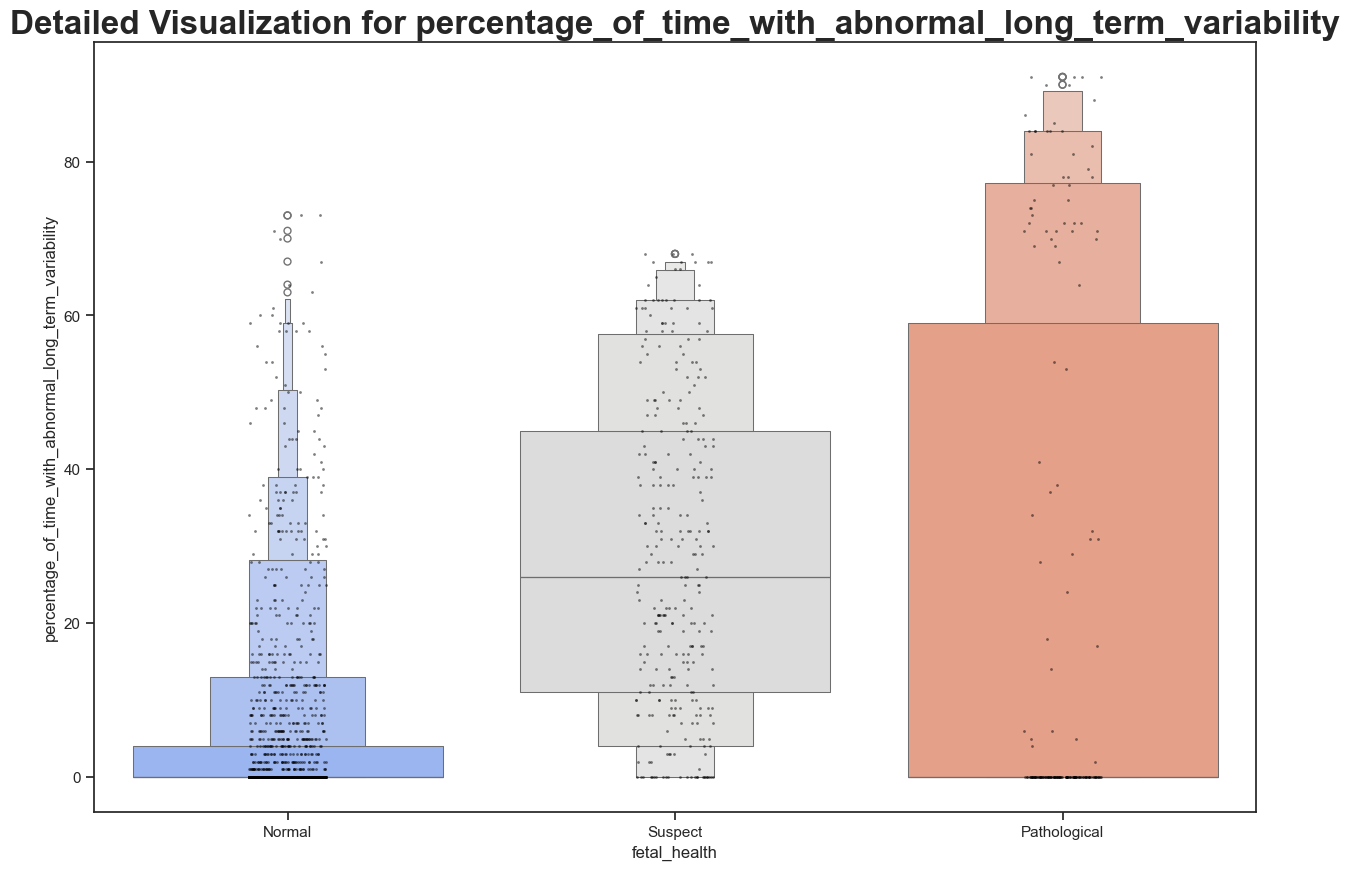

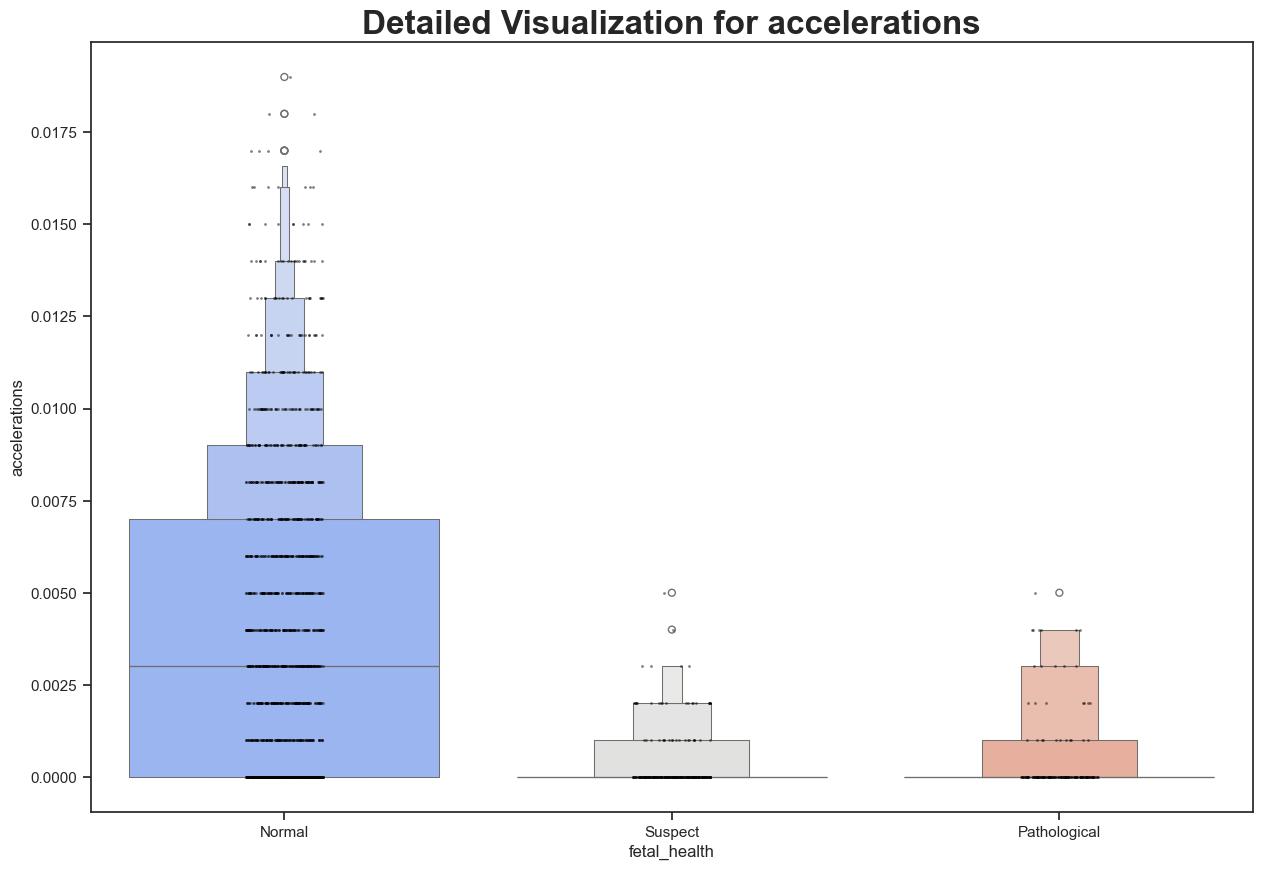

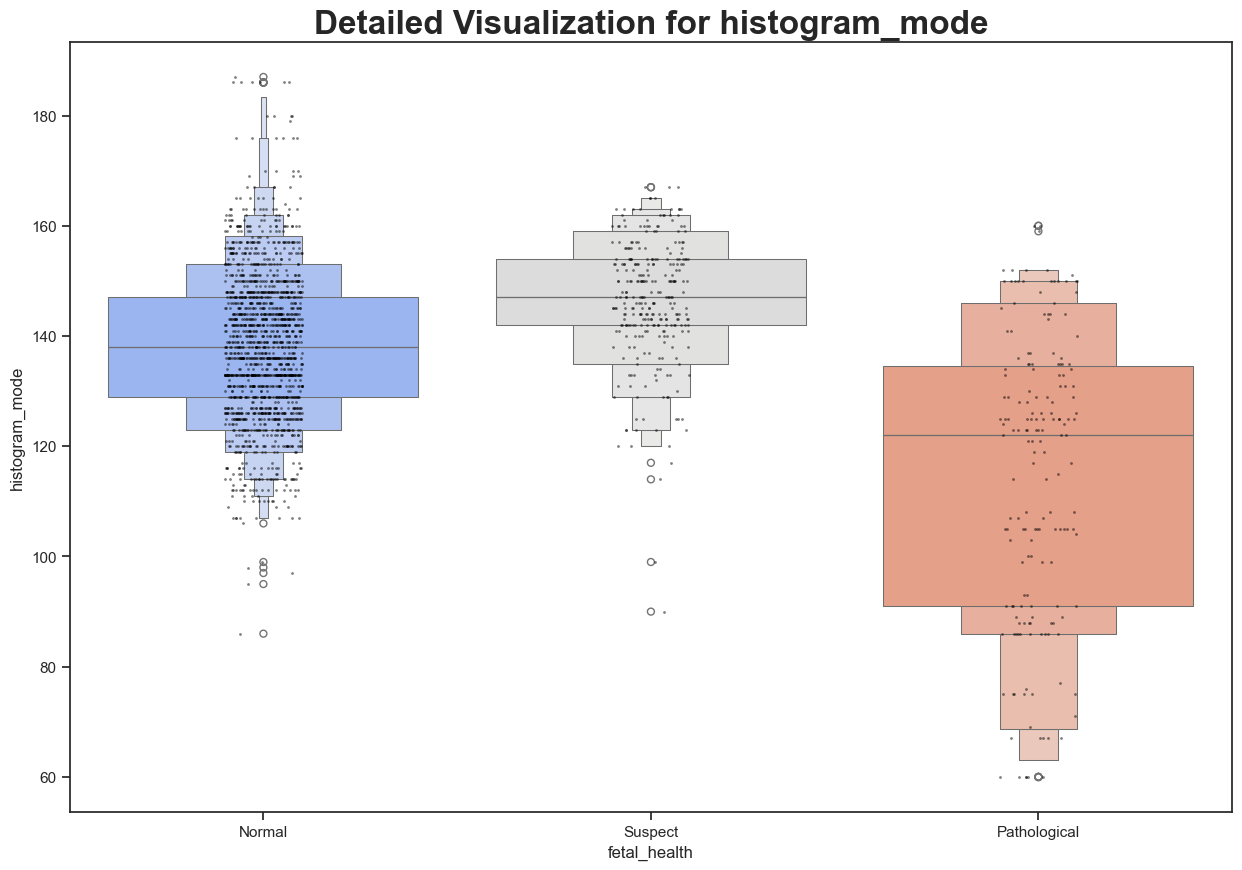

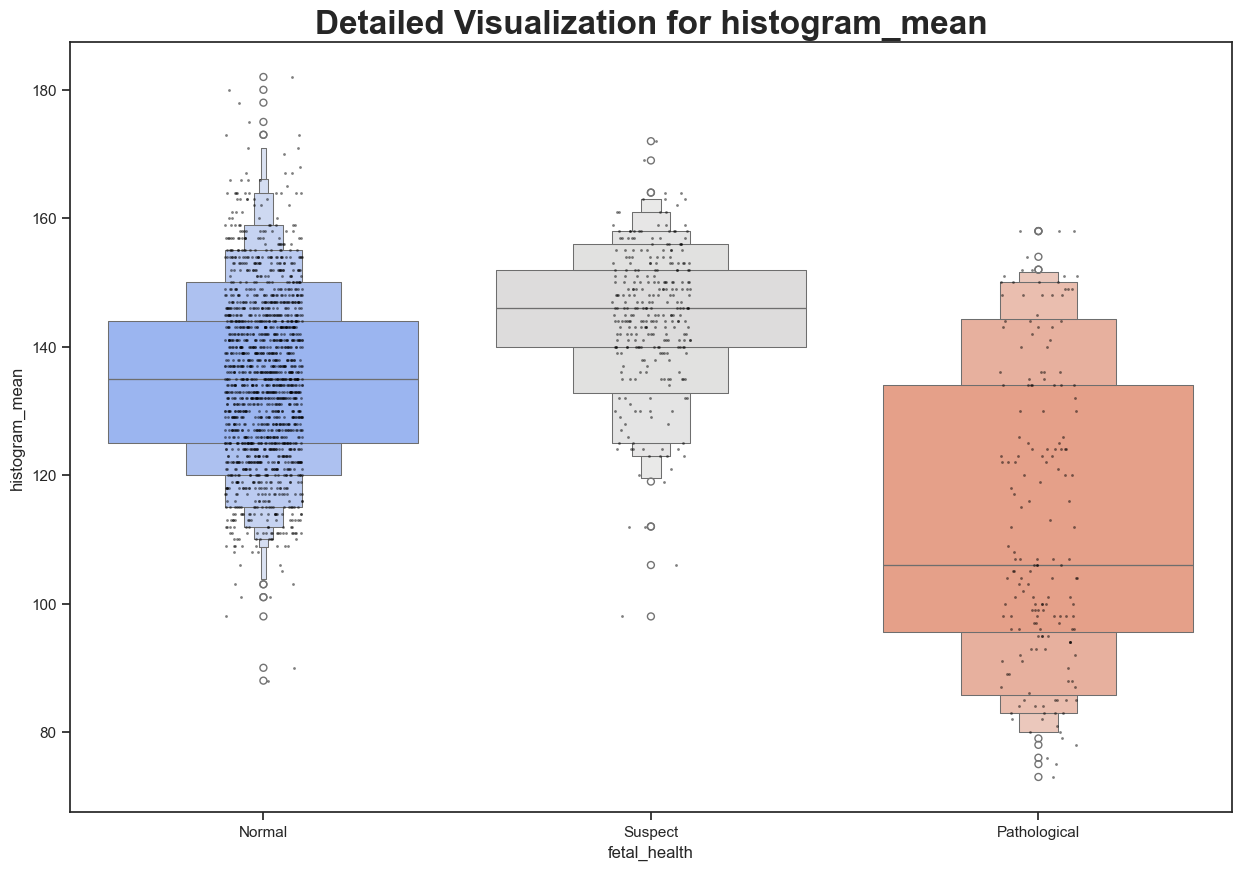

In [29]:
# Columns for detailed visualization
cols = ['prolongued_decelerations', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability',
        'accelerations', 'histogram_mode', 'histogram_mean']

# Create strip plots and boxen plots for selected columns
for i in cols:
    plt.figure(figsize=(15, 10))
    sns.stripplot(x=data["fetal_health"], y=data[i], color="black", alpha=0.5, size=2, jitter=True, dodge=True)
    sns.boxenplot(x=data["fetal_health"], y=data[i], palette='coolwarm')
    
    plt.title(f'Detailed Visualization for {i}',
              fontsize=24,
              fontweight='bold')
    plt.xticks([0, 1, 2], ['Normal','Suspect','Pathological'])


# Data Processing

**Feature Selection**

Feature selection should be performed to find the best set of features that allow the creation of optimized models of the studied phenomena.

In [30]:
import pandas as pd

In [31]:
from sklearn import preprocessing

In [32]:
from sklearn.feature_selection import SelectKBest

In [33]:
from sklearn.feature_selection import f_classif

In [34]:
# Feature Selction With K-Best
X = data.drop(['fetal_health'], axis=1)
Y = data['fetal_health']

bestfeatures = SelectKBest(score_func=f_classif, k='all')

fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

**SelectKBest** uses statistical tests such as the chi-square test, ANOVA F test, or mutual information score to evaluate and rank features based on their correlation with the target variable. It then selects the top K features with the most important importance score to be included in the final feature subset.

In [35]:
# Concatenate Two DataFrames For Better Understanding
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature','Score']

# Sort Features Based On Importance Scores
featureScores = featureScores.sort_values(by='Score', ascending=False)
print(featureScores)

                                              Feature       Score
6                            prolongued_decelerations  507.304309
7                     abnormal_short_term_variability  337.703020
9   percentage_of_time_with_abnormal_long_term_var...  335.386156
17                                     histogram_mean  298.759569
16                                     histogram_mode  276.382795
18                                   histogram_median  249.699523
1                                       accelerations  194.618345
19                                 histogram_variance  150.955827
0                                      baseline value  137.833999
8                mean_value_of_short_term_variability  118.050463
3                                uterine_contractions   93.647474
12                                      histogram_min   86.468440
10                mean_value_of_long_term_variability   69.418940
4                                 light_decelerations   66.750344
11        

C:\Users\hp\AppData\Local\Temp\ipykernel_11220\1985747803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=featureScores, x='Score', y='Feature', palette='coolwarm', linewidth=0.5, saturation=2,


Text(0.5, 1.0, 'Feature Importance')

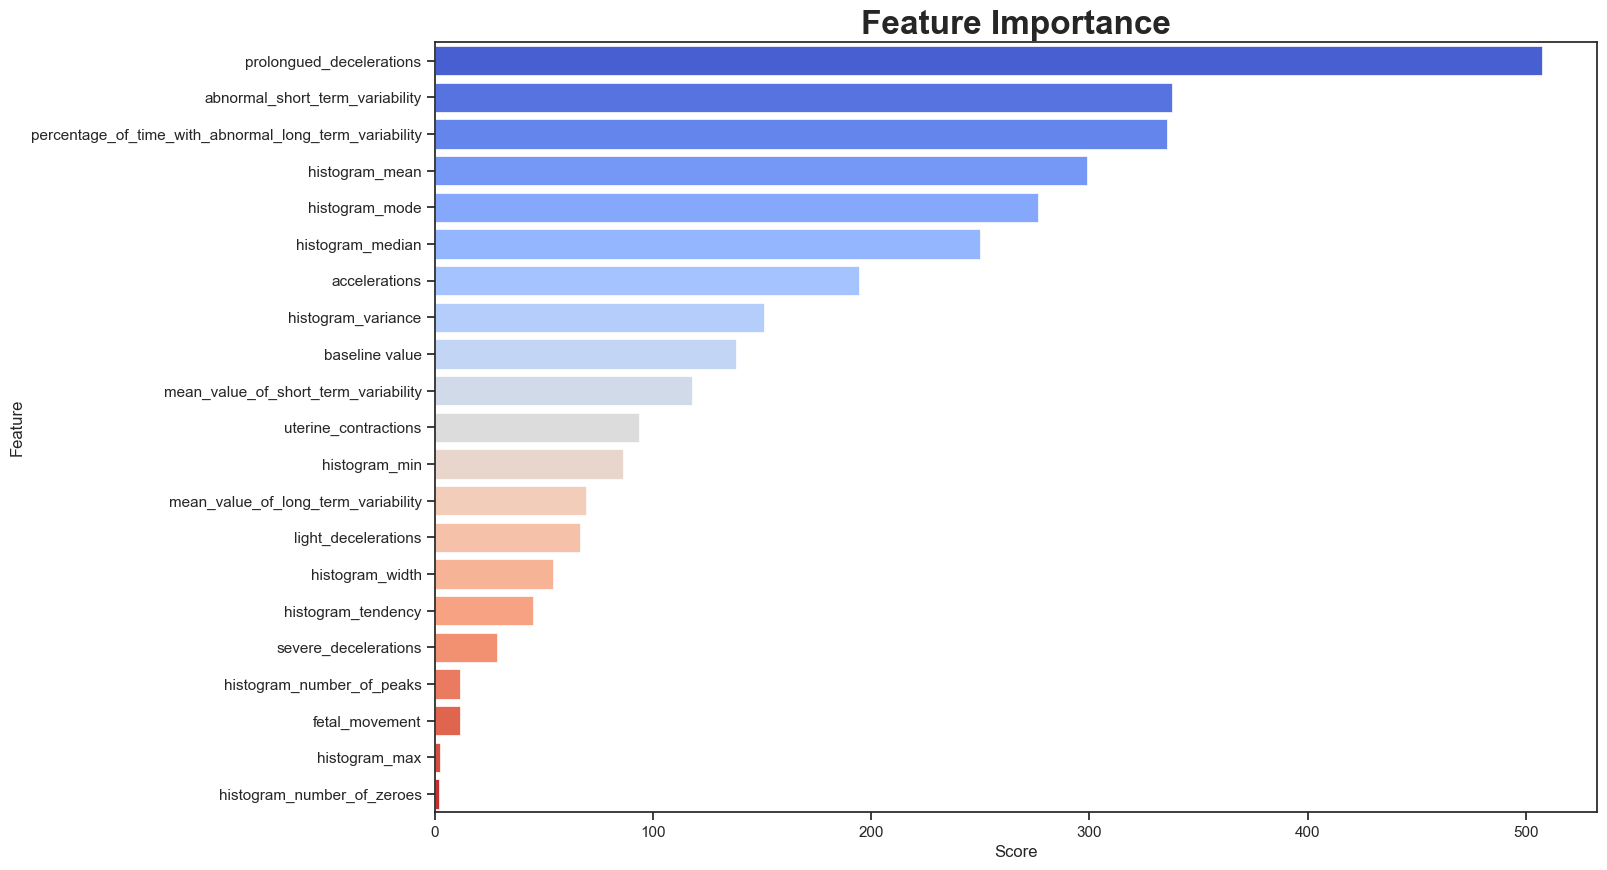

In [36]:
# Visualization The Importance Scores
fig, ax = plt.subplots(figsize = (15, 10))
plot = sns.barplot(data=featureScores, x='Score', y='Feature', palette='coolwarm', linewidth=0.5, saturation=2,
                   orient='h')
plt.title('Feature Importance',
         fontsize = 24,
         fontweight = 'bold')

In [37]:
# Finding The Least Correlated Features With Fetal Health
low_score_features = featureScores[featureScores['Score'] < 15]
print(low_score_features)

                       Feature      Score
14   histogram_number_of_peaks  11.726828
2               fetal_movement  11.700712
13               histogram_max   2.523350
15  histogram_number_of_zeroes   2.134901


In [38]:
#print(data.columns)
#print(set(features_to_drop) - set(data.columns))

In [39]:
# Dropping the features that are below the threshold
features_to_drop = ['histogram_number_of_peaks', 'fetal_movement', 'histogram_max', 'histogram_number_of_zeroes']
data = data.drop(features_to_drop, axis=1)

**Feature Scaling**

Feature Scaling is a technique for standardizing individual features in data into a fixed range. It is performed to handle highly variable quantities or values or units.

If feature scaling is not done, a machine learning algorithm will tend to weigh larger values as higher values and treat smaller values as lower values, regardless of the unit of the values.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

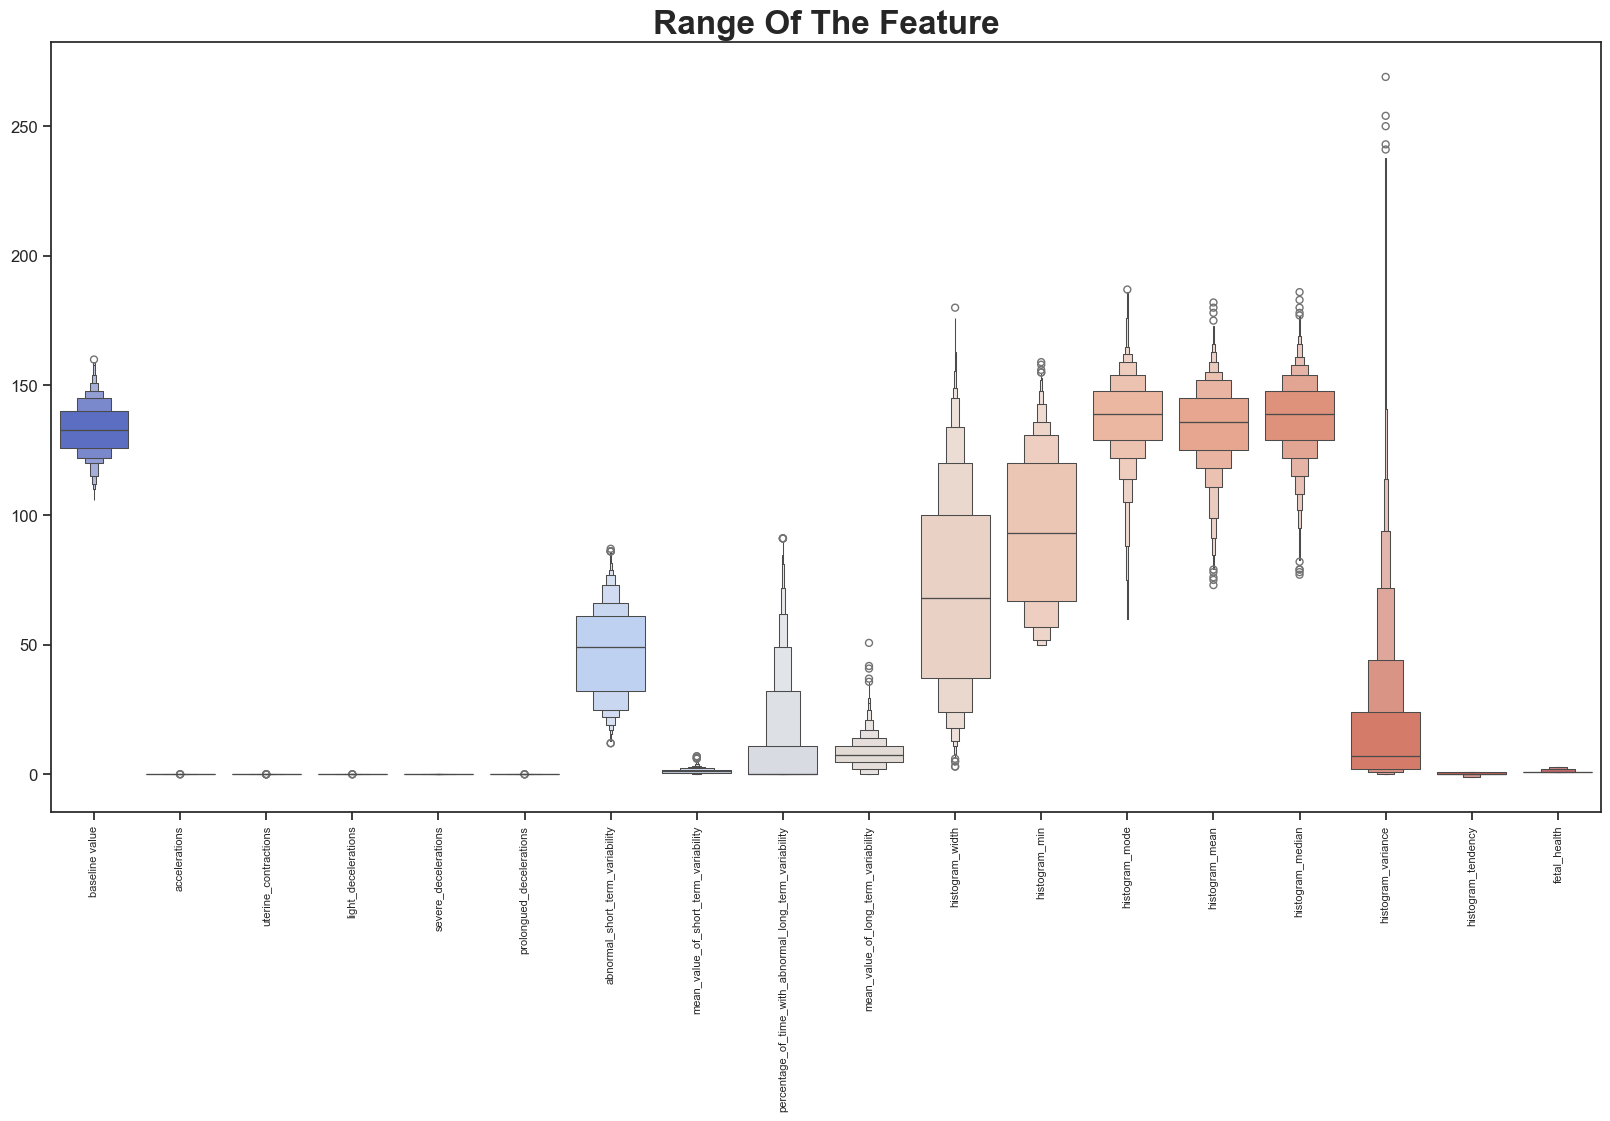

In [40]:
# Range Of The Feature
plt.figure(figsize=(20, 10))
sns.boxenplot(data=data, palette='coolwarm')

plt.title('Range Of The Feature',
         fontsize=24,
         fontweight = 'bold')
plt.xticks(rotation = 90, fontsize = 8)
plt.yticks(fontsize = 12)

**Value ranges of the features are very different** and performing operations with these **values will not lead to a healthy result**. Therefore, features need to be scaled for a certain range.

In [41]:
# Splitting Data Into Features(X) And Outcomes(y)
X = data.drop(['fetal_health'], axis=1)
y = data['fetal_health']

**Standard Scaler**

Standardize features by removing the mean and scaling to unit variance.

In [42]:
# Set up a Standard Scaler For The Feature 
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()

X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns =col_names )

In [43]:
# Descriptions Of Standard Features 
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,-1.143325e-15,1.000237,-2.776252,-0.742724,-0.030989,0.680746,2.714274
accelerations,2113.0,6.725440e-18,1.000237,-0.823776,-0.823776,-0.307036,0.726444,4.085254
uterine_contractions,2113.0,8.070528e-17,1.000237,-1.492245,-0.811961,0.208464,0.888747,3.609880
light_decelerations,2113.0,-8.070528e-17,1.000237,-0.641203,-0.641203,-0.641203,0.370643,4.418027
severe_decelerations,2113.0,-6.725440e-18,1.000237,-0.057653,-0.057653,-0.057653,-0.057653,17.345234
prolongued_decelerations,2113.0,4.035264e-17,1.000237,-0.269640,-0.269640,-0.269640,-0.269640,8.183605
abnormal_short_term_variability,2113.0,-1.345088e-17,1.000237,-2.037640,-0.873069,0.116815,0.815557,2.329499
mean_value_of_short_term_variability,2113.0,-4.035264e-17,1.000237,-1.283731,-0.718221,-0.152712,0.412798,6.407199
percentage_of_time_with_abnormal_long_term_variability,2113.0,2.690176e-17,1.000237,-0.534294,-0.534294,-0.534294,0.065725,4.429504
mean_value_of_long_term_variability,2113.0,1.076070e-16,1.000237,-1.450150,-0.633328,-0.136131,0.467607,7.552654


(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 [Text(0, -10.0, '−10'),
  Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20')])

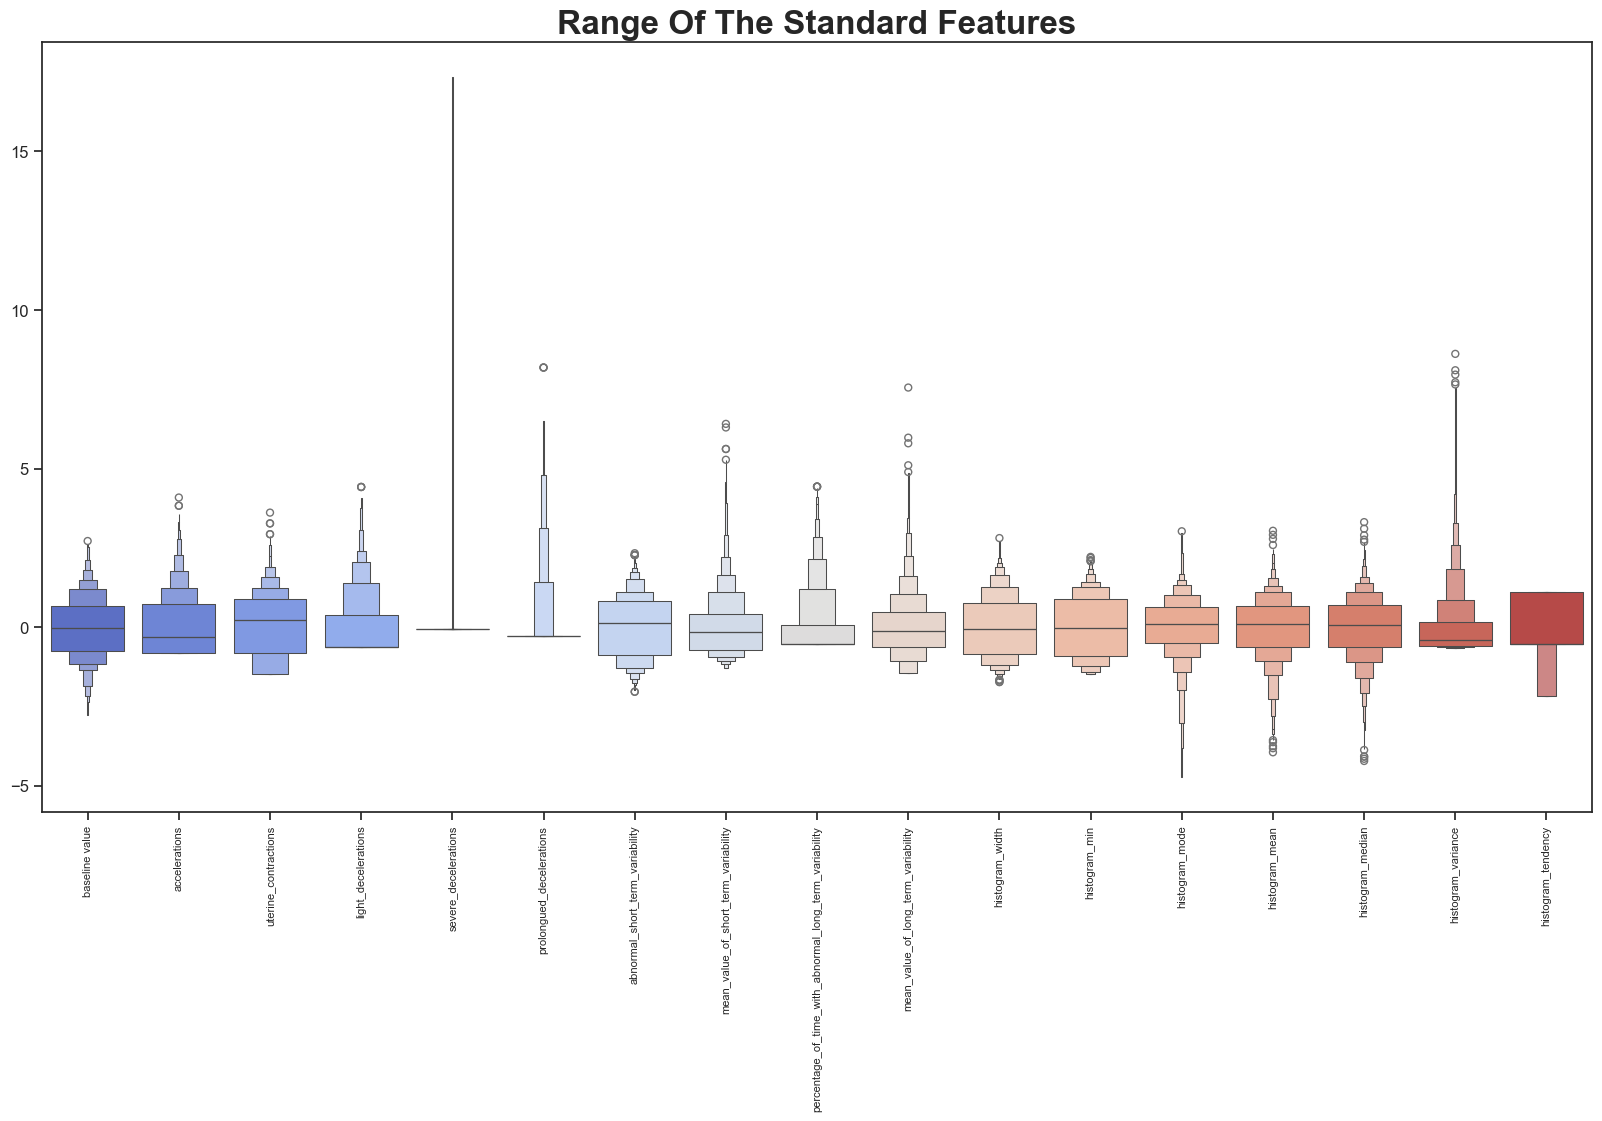

In [44]:
# Plot The Standard Features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df, palette = 'coolwarm')

plt.title('Range Of The Standard Features',
         fontsize = 24,
         fontweight = 'bold')

plt.xticks(rotation= 90, fontsize = 8)
plt.yticks(fontsize=12)

Numerical input values in the dataset were standardized in the pre-processing step with removing the mean and scaling each feature to unit variance to express correlations in training the models as can be seen in the figure above.

# Model Evalution 

**Splitting the dataset into training and test test**

In [45]:
# Import Preprocessing
from sklearn import preprocessing

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit

In [47]:
# Split The Dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_df, y ,test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1690, 17), (423, 17), (1690,), (423,))

**K-Nearest-Neighbors Classification**

**KNN or K-Nearest Neighbors Algorithm** is a non-parametric supervised learning classifier that uses proximity to make classifications or predictions about the grouping of an individual data point.


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn =KNeighborsClassifier()

In [50]:
# Parameter Tuning With GridSearchCV
param_knn = {
    'n_neighbors': list(range(1,31)),
    'p':(1, 2),
    'weights':('uniform','distance'),
    'metric':('minkowski', 'chebyshev')
}

**GridSearchCV**

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model

In [51]:
from sklearn.svm import SVC   #SVC- Support Vector Classifiers 

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
#from sklearn.model_selection import learning_curve

In [54]:
# Fitting The Model For GridSearchCV
grid_search_knn = GridSearchCV(knn, param_knn, cv=10, n_jobs= -1, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': (1, 2), 'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [55]:
# Best Parameters For KNN
grid_search_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

In [56]:
#Fitting KNN with the Best ParameterParameters 
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=1, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

# Prediction and Accuracy

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
#Prediction and Accuracy
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred) * 100

92.90780141843972

In [59]:
# Show 20 Predicted and Actual Values - KNN
pd.DataFrame ({'Prediction':y_pred[:20], 'Actual':y_test[:20]})

,Prediction,Actual
601,1.0,2.0
2005,1.0,1.0
427,1.0,1.0
291,2.0,2.0
197,2.0,2.0
800,2.0,2.0
865,1.0,1.0
1487,1.0,1.0
1988,1.0,1.0
1640,1.0,1.0


In [60]:
# KNN Classification Report(Precision, recall, f1-score, support, accuracy)
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       341
         2.0       0.75      0.72      0.74        54
         3.0       0.90      0.93      0.91        28

    accuracy                           0.93       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.93      0.93      0.93       423



In [62]:
# Confusion Matrix Import
from  sklearn.metrics import confusion_matrix

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

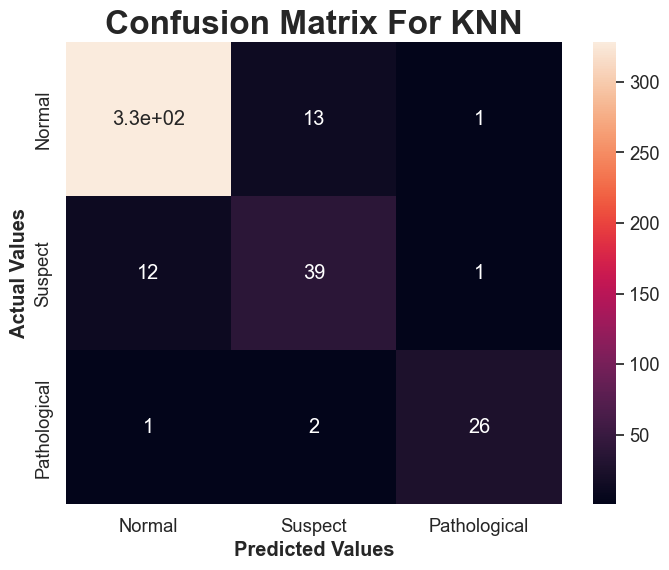

In [63]:
# Confusion Matrix For KNN
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, ax=ax)

ax.set_xlabel('Predicted Values',
             fontweight = 'bold')
ax.set_ylabel('Actual Values',
             fontweight = 'bold')
ax.set_title('Confusion Matrix For KNN',
            fontsize = 24,
            fontweight = 'bold')
ax.xaxis.set_ticklabels(['Normal','Suspect','Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

**Random Forest Classification**

**Random Forest** is a classifier that contains a set of decision trees over various subsets of a given dataset and takes the average to **improve the prediction accuracy** of that dataset.

In [64]:
# Import Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

In [65]:
# Random Forest Classifier
rf = RandomForestClassifier()

In [73]:
from sklearn.model_selection import GridSearchCV
# Parameter Turning With GridSearchCV
param_grid={
    'n_estimators': [50, 100, 200],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid, cv = 10)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
# Best Parameter For Random Forest
best_params_for_rf = grid_search_rf.best_params_
print(best_params_for_rf)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Fitting Random Forest With The Best Parameter 
rf_classifier = RandomForestClassifier(**best_params_for_rf, random_state = 42) 
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# Prediction And Accuracy
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf) * 100

96.45390070921985

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
from joblib import dump

dump(rf_classifier,'predict_model.joblib')

['predict_model.joblib']

In [86]:
from joblib import load

loaded_rf_classifier = load('predict_model.joblib')

In [ ]:
# Show Predicted And Actual Values - Random Forest
pd.DataFrame({'Prediction': y_pred_rf[:20], 'Actual': y_test[:20]})

,Prediction,Actual
601,1.0,2.0
2005,1.0,1.0
427,1.0,1.0
291,2.0,2.0
197,2.0,2.0
800,2.0,2.0
865,1.0,1.0
1487,1.0,1.0
1988,1.0,1.0
1640,1.0,1.0


In [ ]:
# Random Forest Classification Report (Precision, recall, f1-score, support, accuracy)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       341
         2.0       0.91      0.80      0.85        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.96       423
   macro avg       0.96      0.93      0.94       423
weighted avg       0.96      0.96      0.96       423



[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

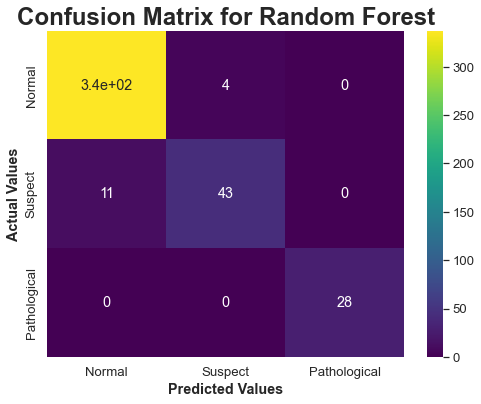

In [ ]:
# Confusion matrix for Random Forest Classification
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, ax=ax, cmap='viridis')

ax.set_xlabel('Predicted Values',
              fontweight='bold')
ax.set_ylabel('Actual Values',
              fontweight='bold')
ax.set_title('Confusion Matrix for Random Forest',
             fontsize=24,
             fontweight='bold')
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

**Support Vector Machine**

The purpose of the **Support Vector Machine** algorithm is to create the best line or decision boundary that can divide the n-dimensional space into different classes to easily put the new data that may come into the right category. This best decision boundary is called the hyperplane.

In [ ]:
# Support Vector Classifier 
svc = SVC()

In [ ]:
# Parameter tuning with GridSearchCV
param_grid_svc = {
    'C' : [0.1,1,10],
    'gamma' : ['scale', 'auto', 0.001, 0.01],
    'kernel': ['linear', 'rbf', 'poly'],
}
grid_search_svc = GridSearchCV(SVC(random_state = 42), param_grid_svc, cv=10)
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.001, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
# Best parameters for SVC
best_params_for_svc = grid_search_svc.best_params_
print(best_params_for_svc)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# Fitting SVC With the best parparameter 
svc_classifier = SVC(**best_params_for_svc, random_state = 42)
svc_classifier.fit(X_train, y_train)

SVC(C=10, random_state=42)

In [ ]:
# Prediction And Accuracy
y_pred_svc = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_svc) * 100

95.50827423167848

In [ ]:
# Show 20 Predicted and Actual Values - SVC
pd.DataFrame({'Prediction': y_pred_svc[:20], 'Actual': y_test[:20]})

,Prediction,Actual
601,2.0,2.0
2005,1.0,1.0
427,1.0,1.0
291,2.0,2.0
197,2.0,2.0
800,2.0,2.0
865,1.0,1.0
1487,1.0,1.0
1988,1.0,1.0
1640,1.0,1.0


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

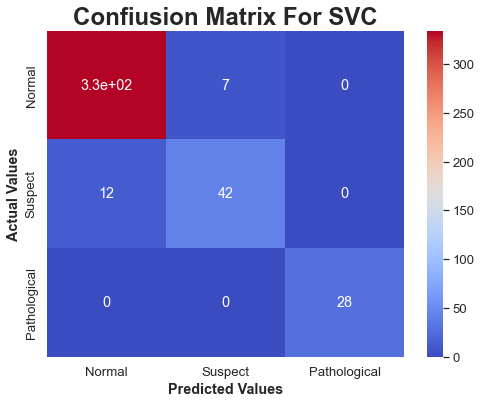

In [ ]:
# Confusion Matrix For SVC
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, ax=ax, cmap='coolwarm')

ax.set_xlabel('Predicted Values',
             fontweight= 'bold')
ax.set_ylabel('Actual Values',
             fontweight = 'bold')
ax.set_title('Confiusion Matrix For SVC',
            fontsize = 24,
            fontweight = 'bold')
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

In [ ]:
# SVC Classification report(precision, recall, f1-score, support, accuracy)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       341
         2.0       0.86      0.78      0.82        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.96       423
   macro avg       0.94      0.92      0.93       423
weighted avg       0.95      0.96      0.95       423



In [ ]:
# Training, test scores and margin of error of the models
pd.DataFrame({
    'Model':['KNN', 'Random Forest', 'SVC'],
    'Trainning Score': [knn.score(X_train, y_train), 
                        rf_classifier.score(X_train, y_train), 
                        svc_classifier.score(X_train, y_train)],
    'Test Score': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svc)],
    'Error': [knn.score(X_train, y_train) - accuracy_score(y_test, y_pred), rf_classifier.score(X_train, y_train) - accuracy_score(y_test, y_pred_rf),
 svc_classifier.score(X_train, y_train) - accuracy_score(y_test, y_pred_svc)]
})

,Model,Trainning Score,Test Score,Error
0,KNN,0.999408,0.929078,0.070330
1,Random Forest,0.999408,0.964539,0.034869
2,SVC,0.958580,0.955083,0.003497


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
estimator = KNeighborsClassifier()

In [ ]:
n_jobs = -1 

In [ ]:
train_sizes = [...] 

In [ ]:
train_sizes = [50, 100, 200, 500, 1000] 

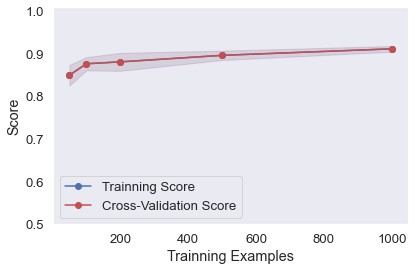

In [ ]:
# Function to plot learning curve for models
ylim = (0.5, 1.01)
def plot_learning_curve(estimator, title, X, y, ylim=None, n_jobs = None, train_sizes = np.linspace(0.1, 1.0, 5)):
    plt.figure(fontsize=(10,6))
    plt.grid(True)
    plt.title(title,
             fontsize=24,
             fontweight = 'bold')
    
if  ylim is not None:
    plt.ylim(*ylim)
    plt.xlabel("Trainning Examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = 10, n_jobs = n_jobs,  train_sizes = train_sizes, scoring='accuracy', shuffle=True, random_state=42)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                                train_scores_mean + train_scores_std , alpha = 0.1, color = "r")
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha = 0.1, color = "b")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Trainning Score")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label = "Cross-Validation Score")
    
    plt.legend(loc="best")
    plt.tight_layout()
    #return plt

In [67]:
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.title(title, fontsize=24, fontweight='bold')  # Set font size for the title


In [76]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(model, title, X, y, n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=n_jobs, train_sizes=np.linspace(.1, 1.0, 5))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_mean, '--', color="r", label="Training score")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, test_mean, '-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

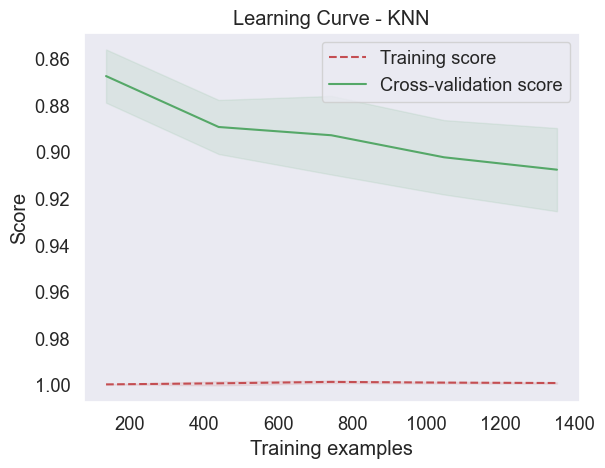

In [77]:
#Plot Leanning Curve For KNN
learning_curve_plot = plot_learning_curve(grid_search_knn.best_estimator_, "Learning Curve - KNN", X_train, y_train, n_jobs = -1)
#learning_curve_plot.show()

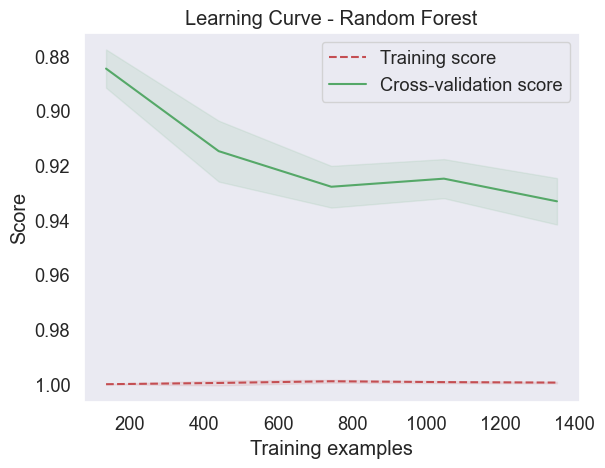

In [78]:
#Plot Learning Curve For Random Forest
learning_curve_plot = plot_learning_curve(grid_search_rf.best_estimator_, "Learning Curve - Random Forest", X_train, y_train, n_jobs= -1)


In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
svc = SVC(probability=True)
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy')

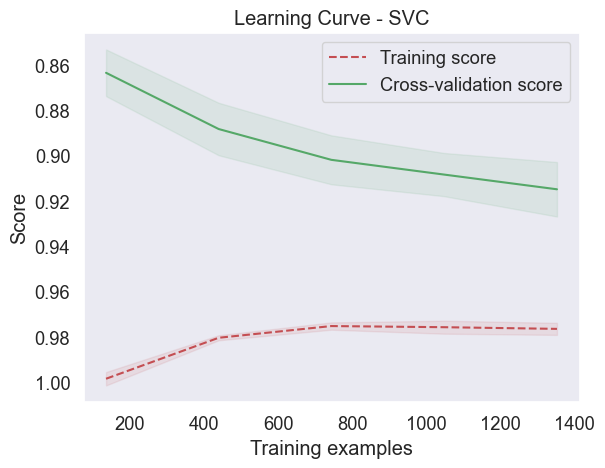

In [81]:
# Plot Learning Curve For SVC
learning_curve_plot = plot_learning_curve(grid_search_svc.best_estimator_, "Learning Curve - SVC", X_train, y_train, n_jobs=-1 )

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
#models.append(("Linear Discriminat Analysis",Linear Discriminat Analysis()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K-Nearest Neighbor",KNeighborsClassifier()))
#models.append(("K-Nearest Neighbor",KNeighborClassifier()))

In [ ]:
scoring='accuracy'

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [ ]:
for name,model in models:
    Kfold= KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model, train_X, train_y, cv = kfold, scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%d %d" % (name, cv_result,mean()))

In [ ]:


X_test = data.iloc[614:,]

In [ ]:
X_test.head()

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

In [ ]:
prediction = LR.predict(X_test)

In [ ]:
LR = 0.01

In [ ]:
print(prediction)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train = [[1.0],[2.0],[3.0]]
y_train = [2.0,4.0,6.0]

model = LinearRegression()
model.fit(X_train, y_train)

X_new = [[4.0]]

prediction = model.predict(X_new)

print(prediction)

In [ ]:
t = LR.predict([[0.0, 0.0, 0.0, 1, 0.0, 1690, 17, 42, 1]])

In [ ]:
print(t)

In [ ]:
import pickle
file = "C:/Users/HENI TAILOR/Fetal Health Classification Project/Model/ML_Model1.pkl"
with open(file, 'wb') as f:
    pickle.dump(svc, f)
    

In [ ]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [ ]:
cy = k.predict([[0.0, 0.0, 0.0, 1, 0.0, 1690, 17, 42, 1]])